# Homework 4/5 - Problem 3
Ross Freeman

## Stability of Various Points
$\nabla f(x^*) = (\begin{matrix} 
0 & 1 \\
-1 & - \mu 
\end{matrix}) \\ 
\lambda_{1/2} = \frac{-\mu}{2} \pm \sqrt{\frac{\mu^2}{4} - 1} \\
\frac{\mu^2}{4} - 1 \geq 0 \\
\mu^2 \geq 4 \\
\mu \geq 2, \,\, \mu \leq -2
$

$\lambda$ is real and positive when $\mu \leq 2$, resulting in an unstable node. $\lambda$ is real and negative when $\mu \geq 2$, resulting in a stable node. When $0 < \mu < 2$, $\lambda$ is complex with $\alpha > 0$, resulting in an unstable focus. When $-2 < \mu < 0$, $\lambda$ is complex with $\alpha < 0$, resulting in a fixed focus. When $\mu = 0$, $\lambda$ is once again complex, but with $\alpha = 0$, resulting in an elliptic point.

Ralf: Very nice explanation!

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Eigenvalues for Various Values of $\mu$

In [14]:
mu = np.arange(-3,3,0.1)
ev = np.zeros((mu.shape[0], 2))

#Ralf: This is the issue I explained in class: You have to turn 'mu' into an array of 
#complex numbers so that the square root does not produce NaNs. You have to do the same with
# 'ev', since otherwise it will recast the complex values to real during assignment.

mu = np.arange(-3,3,0.1) + 0j
ev = np.zeros((mu.shape[0], 2)) + 0j

# Enumerate over all mu's and determine/store both eigenvalues
for (idx, val) in enumerate(mu):
    ev[idx][0] = -mu[idx] / 2 + np.sqrt(np.power(mu[idx], 2) / 4 - 1)
    ev[idx][1] = -mu[idx] / 2 - np.sqrt(np.power(mu[idx], 2) / 4 - 1)

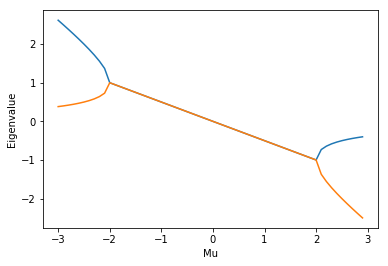

In [12]:
plt.figure()
plt.plot(np.real(mu), np.real(ev), '-')
plt.xlabel('Mu')
plt.ylabel('Eigenvalue')
plt.show()

Ralf: Also plot the imaginary part:

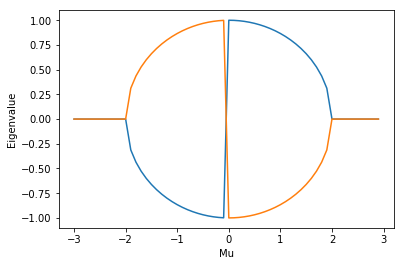

In [13]:
plt.figure()
plt.plot(np.real(mu), np.imag(ev), '-')
plt.xlabel('Mu')
plt.ylabel('Eigenvalue')
plt.show()

## Solving the ODE

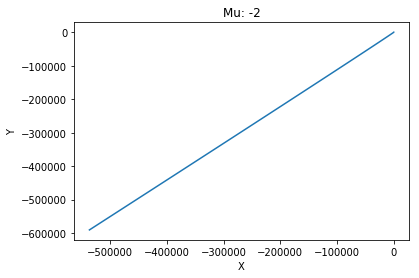

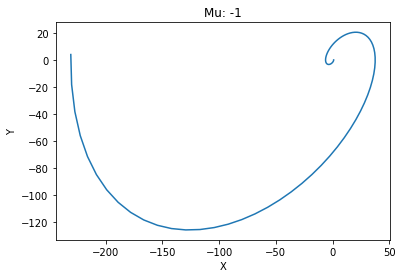

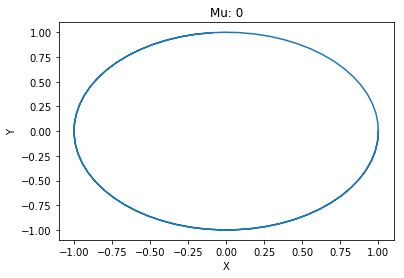

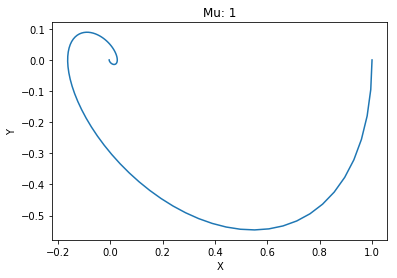

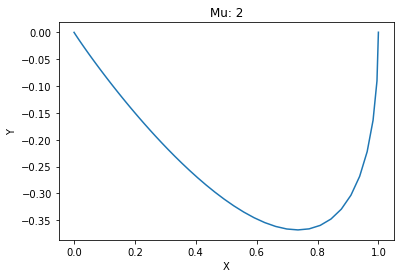

In [15]:
def rhs(y, t, mu):
      dydt = [y[1], -y[0] - mu*y[1]]
      return dydt

t = np.arange(0,11,.1)
mu = np.array([-2, -1, 0, 1, 2])

y = np.array([1, 0])

# Compute and plot integral for all values of mu
for val in mu:
    plt.figure()
    sol = odeint(rhs, y, t, args=(val,))
    plt.plot(sol.T[0], sol.T[1], '-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Mu: {}".format(val))
    plt.show()

The results confirm the stability of the points as described earlier.

Ralf: Those look correct!